[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shaneahmed/StatswithPython/blob/main/03-DataVisualisation.ipynb) 

[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/shaneahmed/StatswithPython/blob/main/03-DataVisualisation.ipynb)

# Data Visualisation Techniques
In this notebook we will focus on data visualisation techniques using python. We will mainly work with three python packages pandas, seaborn and matplotlib. We will also consider calculating correlation between multiple variables. Let's start with installing required libraries.

In [1]:
!pip install pandas seaborn matplotlib scipy

Load required libraries

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

We will start with loading builtin data set `iris` in `seaborn` package. The [iris (Fisher data set)](https://archive.ics.uci.edu/ml/datasets/iris) is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The data set has following attributes:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:\
    -- Iris Setosa\
    -- Iris Versicolour\
    -- Iris Virginica

In [6]:
iris = sns.load_dataset('iris')

Let's have a look at the data set

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Distribution
Let's plot distribution of sepal length for the whole data set.

### Histogram

Text(0.5, 1.0, 'Sepal Histogram')

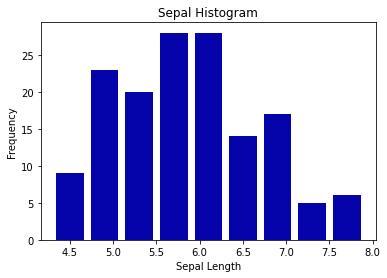

In [23]:
n, bins, patches = plt.hist(x=iris['sepal_length'], bins='auto', color='#0504aa', rwidth=0.80)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Sepal Histogram')

    The y-axis is the grouped frequency distribution of sepal length. Try changing the bin size to experiment with class interval.

### Density Plot
A density plot is a smooth continuous version of a histogram estimated from data. We discussed about skewness and kurtosis.

Kurtosis = -0.5735679489249765
Skewness = 0.3117530585022963


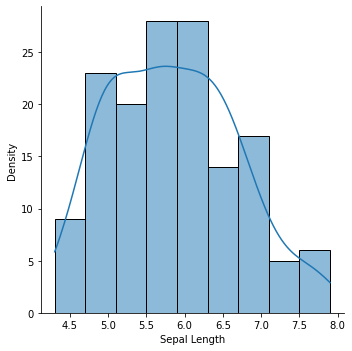

In [47]:
ax = sns.displot(iris['sepal_length'], kde=True)
ax.set(xlabel='Sepal Length', ylabel='Density')
print("Kurtosis = " + str(stats.kurtosis(iris['sepal_length']))) # Display kurtosis
print("Skewness = " + str(stats.skew(iris['sepal_length']))) # Display Skewness 

    Try comparing skewness and kurtosis for the remaining variables with the shape of distribution. 

    You can plot density plot without showing the histogram.

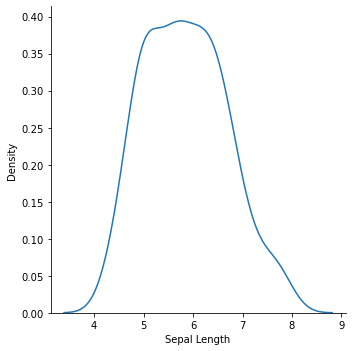

In [48]:
ax = sns.displot(iris['sepal_length'], kind="kde")
ax.set(xlabel='Sepal Length', ylabel='Density')

    You can also plot distribution of sepal length related to each type of iris

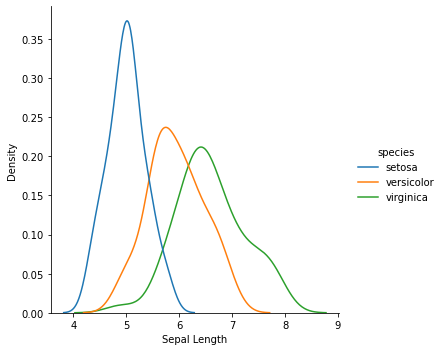

In [51]:
ax = sns.displot(iris, x="sepal_length", hue="species", kind="kde")
ax.set(xlabel='Sepal Length', ylabel='Density')

### Cumulative Distribution

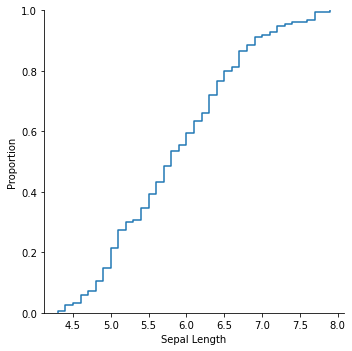

In [53]:
ax = sns.displot(iris, x="sepal_length", kind="ecdf")
ax.set(xlabel='Sepal Length', ylabel='Proportion')

### Box Plot
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

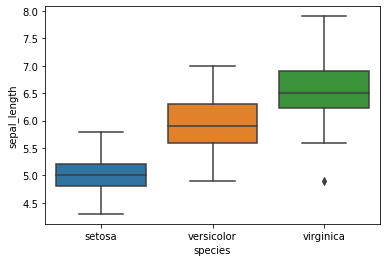

In [55]:
ax = sns.boxplot(x="species", y="sepal_length", data=iris)

### Violet Plots
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

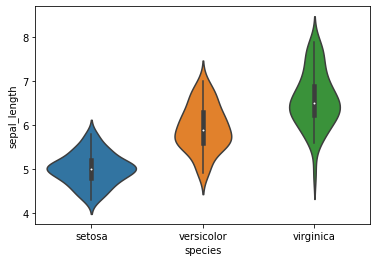

In [56]:
ax = sns.violinplot(x="species", y="sepal_length", data=iris)

You can draw split violins to compare the across the `hue` variable

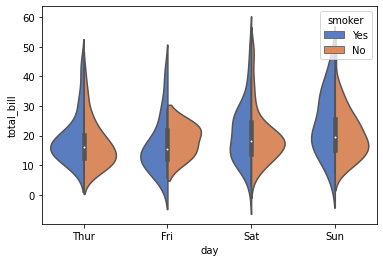

In [57]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)

### Strip Plot
A strip plot can be used where you would like to show all observations along with some representation of the underlying distribution. For example, with a violin plot.

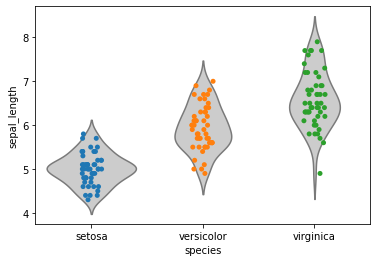

In [59]:
ax = sns.violinplot(x="species", y="sepal_length", data=iris,
                    inner=None, color=".8")
ax = sns.stripplot(x="species", y="sepal_length", data=iris)